<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__1)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-1'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30-1.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.624350,128.566891,127.889027,0.677864
1,0.0,1.0,47.067808,95.047509,91.779690,-1.354352,242.540656,244.456288,-1.915633
2,0.0,2.0,99.291665,61.179446,95.992578,-0.051627,266.412063,266.848566,-0.436503
3,0.0,3.0,36.059748,81.961304,62.806562,0.315474,191.143088,191.147887,-0.004799
4,0.0,4.0,22.561835,57.403703,99.891733,-0.826040,189.031231,190.374202,-1.342971
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.753276,120.805563,120.318910,0.486653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.081346,230.812122,230.818038,-0.005916
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.357472,203.239934,203.318453,-0.078519
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.217012,116.064088,116.693065,-0.628977


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.566891  127.889027  0.677864
      1.0    47.067808  95.047509  91.779690  ...  242.540656  244.456288 -1.915633
      2.0    99.291665  61.179446  95.992578  ...  266.412063  266.848566 -0.436503
      3.0    36.059748  81.961304  62.806562  ...  191.143088  191.147887 -0.004799
      4.0    22.561835  57.403703  99.891733  ...  189.031231  190.374202 -1.342971
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.805563  120.318910  0.486653
      26.0   93.324773  99.972234  27.596461  ...  230.812122  230.818038 -0.005916
      27.0   28.102838  93.083445  72.411123  ...  203.239934  203.318453 -0.078519
      28.0   30.257867  20.848863  55.174370  ...  116.064088  116.693065 -0.628977
      29.0   90.716789  93.036058  71.241563  ...  266.098902  265.034376  1.064526

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.566891  127.889027  0.677864
      1.0    47.067808  95.047509  91.779690  ...  242.540656  244.456288 -1.915633
      2.0    99.291665  61.179446  95.992578  ...  266.412063  266.848566 -0.436503
      3.0    36.059748  81.961304  62.806562  ...  191.143088  191.147887 -0.004799
      4.0    22.561835  57.403703  99.891733  ...  189.031231  190.374202 -1.342971
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.805563  120.318910  0.486653
      26.0   93.324773  99.972234  27.596461  ...  230.812122  230.818038 -0.005916
      27.0   28.102838  93.083445  72.411123  ...  203.239934  203.318453 -0.078519
      28.0   30.257867  20.848863  55.174370  ...  116.064088  116.693065 -0.628977
      29.0   90.716789  93.036058  71.241563  ...  266.098902  265.034376  1.064526

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.624350,128.566891,127.889027,0.677864
1,0.0,1.0,47.067808,95.047509,91.779690,-1.354352,242.540656,244.456288,-1.915633
2,0.0,2.0,99.291665,61.179446,95.992578,-0.051627,266.412063,266.848566,-0.436503
3,0.0,3.0,36.059748,81.961304,62.806562,0.315474,191.143088,191.147887,-0.004799
4,0.0,4.0,22.561835,57.403703,99.891733,-0.826040,189.031231,190.374202,-1.342971
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.753276,120.805563,120.318910,0.486653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.081346,230.812122,230.818038,-0.005916
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.357472,203.239934,203.318453,-0.078519
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.217012,116.064088,116.693065,-0.628977


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.566891  127.889027  0.677864
      1.0    47.067808  95.047509  91.779690  ...  242.540656  244.456288 -1.915633
      2.0    99.291665  61.179446  95.992578  ...  266.412063  266.848566 -0.436503
      3.0    36.059748  81.961304  62.806562  ...  191.143088  191.147887 -0.004799
      4.0    22.561835  57.403703  99.891733  ...  189.031231  190.374202 -1.342971
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.805563  120.318910  0.486653
      26.0   93.324773  99.972234  27.596461  ...  230.812122  230.818038 -0.005916
      27.0   28.102838  93.083445  72.411123  ...  203.239934  203.318453 -0.078519
      28.0   30.257867  20.848863  55.174370  ...  116.064088  116.693065 -0.628977
      29.0   90.716789  93.036058  71.241563  ...  266.098902  265.034376  1.064526

[30000 rows x 7 columns]

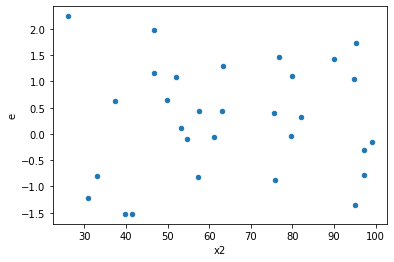

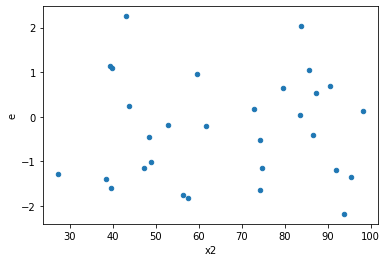

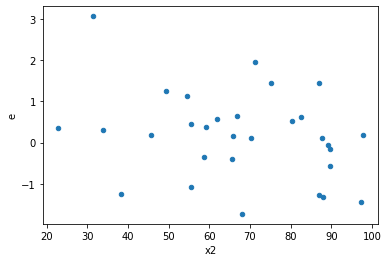

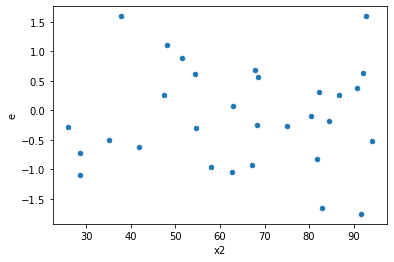

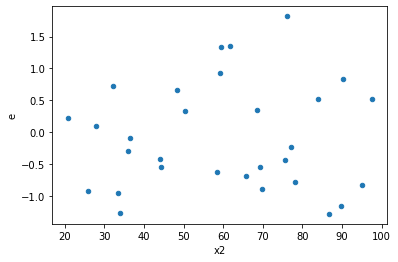

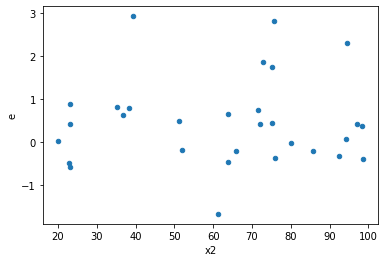

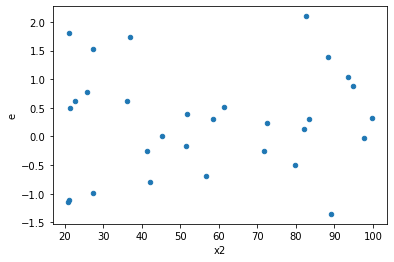

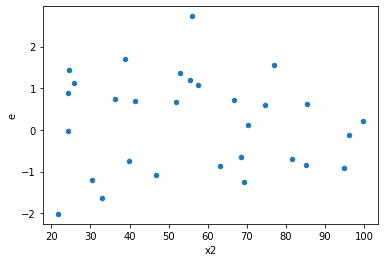

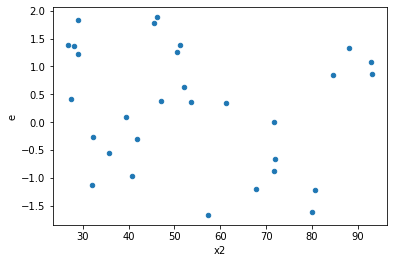

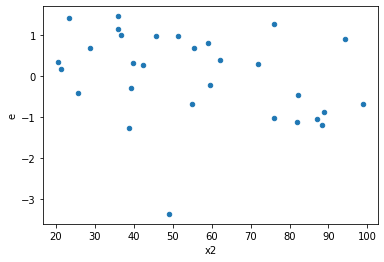

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,11.0,12.031202825391016,17.019502029635255,0.9254771404146935,1.5472274572395686,1.67181596354317,0.39985636927934287,0.8000718153603286,0.19992818463967144,Reject001=1 : Homoscedasticity
1.0,12.0,12.0,13.473076276936895,17.688797359035664,1.122756356411408,1.4740664465863054,1.3128996671172422,0.6447091210787352,0.6776454394606324,0.3223545605393676,Reject001=1 : Homoscedasticity
2.0,8.0,16.0,3.0278499252572693,26.61809541481295,0.37848124065715866,1.6636309634258093,4.395544044764912,0.011424927734595691,0.9942875361327022,0.005712463867297846,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,6.820871788156568,20.314626114089215,0.6820871788156568,1.4510447224349439,2.1273596213235786,0.19119426283642982,0.9044028685817851,0.09559713141821491,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,10.53202073672955,17.58605845374884,0.8776683947274625,1.4655048711457368,1.6697705875586553,0.3869735517396915,0.8065132241301542,0.19348677586984575,Reject001=1 : Homoscedasticity
10.0,10.0,14.0,2.3665286093625877,13.792706529563308,0.23665286093625876,0.9851933235402363,4.163031537597144,0.015724581788884695,0.9921377091055577,0.007862290894442348,Reject001=1 : Homoscedasticity
13.0,14.0,10.0,12.114761219981625,14.16309080588403,0.8653400871415446,1.416309080588403,1.6367080430387317,0.4375919014948204,0.7812040492525898,0.2187959507474102,Reject001=1 : Homoscedasticity
16.0,10.0,14.0,3.046291011387687,10.432951059576983,0.3046291011387687,0.7452107899697845,2.4462889040607982,0.12316209333201966,0.9384189533339902,0.06158104666600983,Reject001=1 : Homoscedasticity
17.0,8.0,16.0,3.4999592709216008,11.429503919642388,0.4374949088652001,0.7143439949776492,1.6328052749929285,0.38422175573730044,0.8078891221313498,0.19211087786865022,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,11.0,12.031202825391016,17.019502029635255,0.9254771404146935,1.5472274572395686,1.67181596354317,0.39985636927934287,Reject001=1 : Homoscedasticity
1.0,12.0,12.0,13.473076276936895,17.688797359035664,1.122756356411408,1.4740664465863054,1.3128996671172422,0.6447091210787352,Reject001=1 : Homoscedasticity
2.0,8.0,16.0,3.0278499252572693,26.61809541481295,0.37848124065715866,1.6636309634258093,4.395544044764912,0.011424927734595691,Reject001=1 : Homoscedasticity
3.0,8.0,16.0,6.790566180851784,9.565665622971292,0.848820772606473,0.5978541014357057,0.704334908769817,0.6316574304261959,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,12.37536974177344,7.215954565985777,0.9519515185979569,0.6559958696350706,0.6891063849566913,0.5175318432271111,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,6.820871788156568,20.314626114089215,0.6820871788156568,1.4510447224349439,2.1273596213235786,0.19119426283642982,Reject001=1 : Homoscedasticity
6.0,11.0,13.0,12.363109435126441,8.691954311984308,1.1239190395569492,0.668611870152639,0.5948932677714998,0.39485749549207766,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,17.118380623006225,9.746814537518226,1.222741473071873,0.9746814537518226,0.7971279908443333,0.6788398706816655,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,10.53202073672955,17.58605845374884,0.8776683947274625,1.4655048711457368,1.6697705875586553,0.3869735517396915,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      983
Reject001=0 : Heteroscedasticity     17
Name: Result_test, dtype: int64